In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as scs
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Funciones

*Calculating Elasticity From Regression Equations with Different Functional Forms*

https://www.youtube.com/watch?v=73jA1PG9B0Y&t=114s

https://medium.com/geekculture/price-elasticity-of-demand-using-linear-regression-in-python-part-2-8adb654328e7

https://economipedia.com/definiciones/elasticidad-ingreso-de-la-demanda.html

https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics#skewness

In [ ]:
# Funciones para cuartiles
def q25(x):
  return x.quantile(0.25)

def q50(x):
  return x.quantile(0.5)

def q75(x):
  return x.quantile(0.75) 

def range(x):
  return x.max() - x.min()

In [ ]:
def diagnostico_residuos(resids):
  # create placeholder subplots
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,6))
  r = resids
  resids = (r - np.nanmean(r)) / np.nanstd(r)
  resids_nonmissing = resids[~(np.isnan(resids))]
  # residuals over time
  sns.scatterplot(x=np.arange(1, len(resids)+1), y=resids, ax=ax1)
  ax1.axhline(0, color='r', linestyle='--')  
  ax1.set_title('Residuos Estandarizados')
  # distribution of residuals
  x_lim = (-1.96 * 2, 1.96 * 2)
  r_range = np.linspace(x_lim[0], x_lim[1])
  norm_pdf = scs.norm.pdf(r_range)
  sns.distplot(resids_nonmissing, hist=True, kde=True,norm_hist=True, ax=ax2)
  ax2.plot(r_range, norm_pdf, 'g', lw=2, label='N(0,1)')
  ax2.set_title('Distribución de residuales estandarizados')
  ax2.set_xlim(x_lim)
  ax2.legend()
  # Q-Q plot
  qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3)
  ax3.set_title('Q-Q plot')
  # Hide last plot
  ax4.axis('off')
  fig.tight_layout(pad=2)
  return fig

### Trabajo Práctico N° 1

In [ ]:
# Leer archivo formato csv
df_tp = pd.read_csv('/content/drive/MyDrive/TP1.csv')

In [ ]:
# Eliminar columna observaciones
df_tp.drop('observacionest', axis=1, inplace=True)

In [ ]:
df_tp.head()

,gastoenalimentosyt,ingresosemanalxt
0,52.250000,258.29999
1,58.320000,343.10001
2,81.790001,425.00000
3,119.900000,467.50000
4,125.800000,482.89999


In [ ]:
# Informacion sobre el dataset
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gastoenalimentosyt  40 non-null     float64
 1   ingresosemanalxt    40 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes


En el dataset hay 40 observaciones y 2 columnas sin ningun valor nulo en las variables X e Y

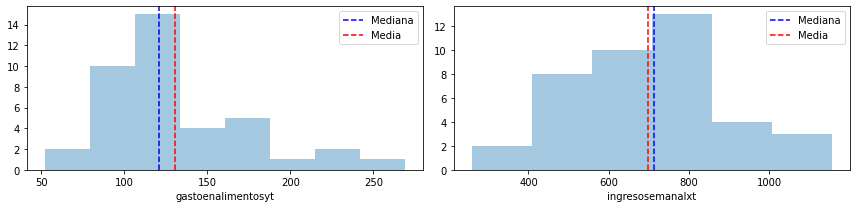

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,3))
sns.distplot(df_tp.gastoenalimentosyt, ax= axes[0], kde=False)
sns.distplot(df_tp.ingresosemanalxt, ax= axes[1], kde=False)
axes[0].axvline(df_tp.gastoenalimentosyt.median(),color='b',linestyle='--',label='Mediana')
axes[0].axvline(df_tp.gastoenalimentosyt.mean(),color='r',linestyle='--',label='Media')
axes[1].axvline(df_tp.ingresosemanalxt.median(),color='b',linestyle='--',label='Mediana')
axes[1].axvline(df_tp.ingresosemanalxt.mean(),color='r',linestyle='--',label='Media')
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
fig.tight_layout()
plt.show()

In [ ]:
# Estadíticas descriptivas de los datos
df_tp.agg(['min',q25,q50,q75,'max','mean',range,'std','skew','kurt']).T

,min,q25,q50,q75,max,mean,range,std,skew,kurt
gastoenalimentosyt,52.25000,100.365000,120.70500,147.685000,269.03,130.313000,216.78000,45.158568,1.075598,1.451209
ingresosemanalxt,258.29999,560.624987,712.29999,820.274995,1154.60,697.999997,896.30001,198.226948,0.227275,0.150349


 En las medidas de tendencia central (media y mediana/q50) se puede observar que la media y mediana de la variable dependiente se encuentran separadas siendo la media > mediana y presentando una diferencia de 148.325 y 68.455, valores cálculados como (máximo - mediana) y (mediana - mínimo) respectivamente, ésto significa que el valor máximo de las observaciones se encuentra un poco más que el doble de lejos con respecto a la mediana en comparación al valor mínimo. Éstos son indicios de asimetría positiva. En cambio en la variable independiente las medidas de tendencia central se encuentran casi juntas, como debería ser en una distribución normal. La diferencia entre el valor máximo-mediana y mediana-mínimo es de 442.3 y 454.0 respectivamente, indicando una distribución bastante simétrica.

 En cuanto a las medidas de dispersión (rango y desviación estándar), las mismas son mayores en la variable exógena que en la endógena.

 El histograma de 'gastosenalimentosyt' indica que las observaciones de ésta variable tienen bastante asimetría positiva con un valor de 1.075598. La kurtosis tiene un valor de 1.451209 indicando que la distribución es bastante leptocúrtica, distribución muy estrecha con la mayoría de las observaciones concentradas alrededor de la media.
 
 Por otro lado, el histograma de 'ingresosemanalxt' los datos parecen tener una distribución que se aproxima a la normal, bastante simétrica. El valor de la asimetría es de 0.227275, casi igual al de un conjunto de datos perfectamente simétricos (asimetría = 0). La kurtosis tiene un valor de 0.150349 indicando que la distribución de los datos se aproxima a la normal (distribución mesocúrtica).

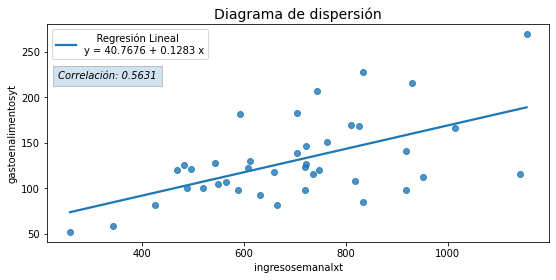

In [ ]:
slope, intercept, r_value, p_value, std_err = scs.linregress(df_tp.ingresosemanalxt,df_tp.gastoenalimentosyt)
plt.figure(figsize=(9,4))
plt.title('Diagrama de dispersión', fontsize=14, fontweight=40)
sns.regplot(df_tp.ingresosemanalxt, df_tp.gastoenalimentosyt, ci=False, line_kws={'label':"    Regresión Lineal\ny = {1:.4f} + {0:.4f} x".format(slope,intercept)})
plt.text(235, 220, f'Correlación: {np.round(df_tp.gastoenalimentosyt.corr(df_tp.ingresosemanalxt), 4)}', style='italic', bbox={'alpha': 0.2, 'pad': 5})
plt.legend() 

En el gráfico se puede observar que a medida que aumentan los ingresos semanales los consumidores tienden a gastar más plata en alimentos. La correlación de Pearson entre ellas es de 0.5631, reafirmando que hay correlación moderada positiva. Hay una relación lineal entre las variables en cuestión, dicho punto es importante por el supuesto de linearidad entre los datos. Otra observación es que a medida que aumentan los ingresos semanales aumenta la dispersión o rango vertical en los gastos en alimentos, dando lugar a posibles outliers y a que el supuesto de normalidad en la distribución de los datos p(y|x) no se este cumpliendo. Los outliers los podemos verificar con unos diagrama de caja.


Text(0.5, 1.0, 'Diagramas de cajas')

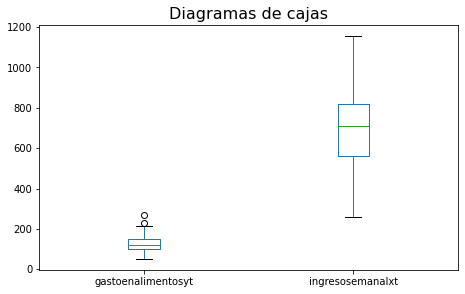

In [ ]:
plt.figure(figsize=(7.5,4.5))
df_tp.boxplot(grid=False)
plt.title('Diagramas de cajas', fontsize=16, pad=6)

Efectivamente podemos observar outliers en la variable dependiente (gastos en alimentos). Estas observaciones anormales pueden distorsionar los coeficientes de regresión y limitar la capacidad del modelo para predecir correctamente los casos normales/habituales.

**Regresión Lineal**

In [ ]:
# Definir variables X y Y
Y = df_tp.gastoenalimentosyt.copy()
X = df_tp.ingresosemanalxt.copy()
X = sm.add_constant(X)

In [ ]:
# Ajustar modelo
modelo = sm.OLS(Y,X)
resultados = modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:     gastoenalimentosyt   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     17.65
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           0.000155
Time:                        19:30:36   Log-Likelihood:                -201.03
No. Observations:                  40   AIC:                             406.1
Df Residuals:                      38   BIC:                             409.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.7676     22.139  

La dirección entre ambas variables es positiva, es decir cuando incrementa en una unidad la variable independiente 'ingresosemanalxt' la variable dependiente 'gastoenalimentosyt' aumenta 0.1283. 

Cuando la variable predictora incluida en el modelo es igual a 0, el valor de la variable dependiente es igual a 40.7676.


*Análisis de residuos*

In [ ]:
# Estadisticas descriptivas
resultados.resid.describe()

count    4.000000e+01
mean     1.350031e-14
std      3.731753e+01
min     -7.175333e+01
25%     -1.966566e+01
50%     -5.969406e+00
75%      1.775182e+01
max      8.014043e+01
dtype: float64

<Figure size 7500x3500 with 0 Axes>

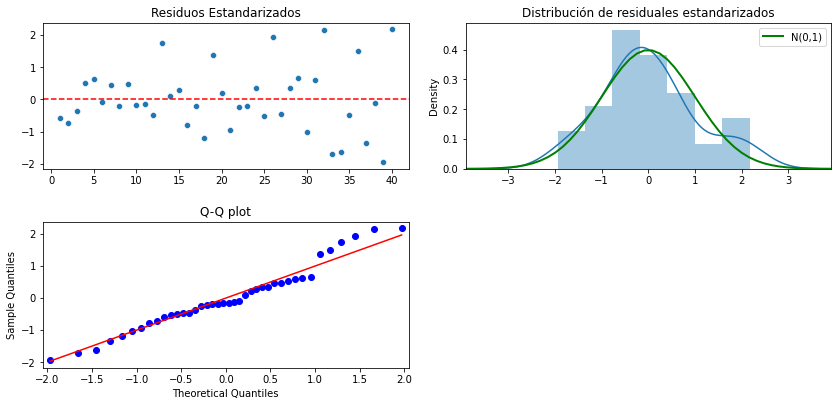

In [ ]:
# Gráficos de residuos del modelo ajustado
plt.figure(figsize=(15,7), dpi=500)
diagnostico_residuos(resultados.resid)
plt.show()

En el gráfico de *Q-Q plot* y el de *Distribución de residuales estandarizados* pareciera que la distribución de los residuales se aproxima a una normal, aún así podemos ver en ellos que hay asimetría positiva. En el Q-Q plot los residuales, aproximadamente a partir del cuantil 1, se desvían por encima de la distribución normal teórica (línea roja); mientras que en el histograma hay residuos que se situan por encima de +2 desviaciones estandar llegando a superar el 95.4% de los demás residuos.

En el gráfico de los *Residuos Estandarizados* vemos que para cada observación de la muestra aumenta la varianza de los residuos a medida que aumentan los valores en X, presentando aparentemente heterocedasticidad.

*Prueba de heterocedasticidad - Glejser test*

H0 = La homocedasticidad está presente en el modelo de regresión

Ha = La heteroscedasticidad está presente en el modelo de regresión 

In [ ]:
# Glejser Test
glejser_test_lr = sm.OLS(abs(resultados.resid), sm.add_constant(resultados.fittedvalues))
glejser_test_rtdo = glejser_test_lr.fit()
print(glejser_test_rtdo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     13.84
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           0.000642
Time:                        19:30:37   Log-Likelihood:                -176.26
No. Observations:                  40   AIC:                             356.5
Df Residuals:                      38   BIC:                             359.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.4680     17.006     -1.968      0.0

Text(0, 0.5, 'residuos absolutos (|e|)')

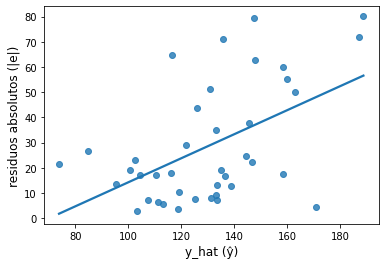

In [ ]:
sns.regplot(resultados.fittedvalues, abs(resultados.resid), ci=False)
plt.xlabel('y_hat (ŷ)', fontsize=12)
plt.ylabel('residuos absolutos (|e|)', fontsize=12)

Luego de estimar una regresión entre los 'valores absolutos de los residuales' y los 'Y sombrero', hacemos una prueba de significancia sobre el coeficiente de la pendiente. Dado que p < 0.05 rechazamos H0, esto significa que la tendencia observada no se explica por casualidad bajo un modelo homocedástico. 

*Prueba de heterocedasticidad - Breush Pagan*

H0 = La homocedasticidad está presente en el modelo de regresión

Ha = La heteroscedasticidad está presente en el modelo de regresión 

In [ ]:
# Breush Pagan Test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sm.stats.diagnostic.het_breuschpagan(resultados.resid, resultados.model.exog)
list(zip(name, test))[1]

('p-value', 0.0005196176486209507)

Dado que p < 0.05 rechazamos la hipótesis nula, por lo tanto asumimos que los residuos no se distribuyen con varianza constante. Hay heteroscedasticidad en el modelo de regresión.

**Análisis de los resultados de salida de la regresión Minimos Cuadrados Ordinarios**

* ***R-squared:*** el 31.7% de la varianza de gastoenalimentosyt es capturada por ingresosemanalxt.
* ***Prob (F-statistic):*** Al ser p(F) < 0.05 rechazamos la hipótesis nula de que todos los coeficientes de la regresión sean igual a 0, es decir que ningún beta esté relacionado con Y.  
* ***std err:*** Al ser el error standard 0.031, la verdadera pendiente de ingresosemanalxt se encuentra entre [0.1283 - 2.0227 * 0.031 < Beta < 0.1283 + 2.0227 * 0.031] (intevalo de confianza), lo que indica que hay una relación positiva entre las variables en estudio.
* ***P>|t|:*** al ser p < 0.05 para el predictor 'ingresosemanalxt', rechazamos la hipótesis nula de que el coeficiente sea igual a 0. Es decir, que es estadítiscamente significativo éste parametro en nuestro modelo de regresión.
* ***Intervalo de confianza:*** Con un nivel de confianza del 95.0%, el rango razonable para nuestro parámetro de 'ingresosemanalxt' es entre 0.066 y 0.190, el valor 0 para nuestro beta no se encuentra dentro del intervalo de confianza. 

**Valores estimados y residuos**

In [ ]:
rtdos_reg = pd.concat([df_tp.gastoenalimentosyt ,resultados.fittedvalues, resultados.resid], axis=1).set_index(np.arange(1,41)).rename({0:'y_sombrero',1:'residuos'}, axis=1)
rtdos_reg.index.name = 'Observaciones'
rtdos_reg

,gastoenalimentosyt,y_sombrero,residuos
Observaciones,,,
1,52.250000,73.904503,-21.654503
2,58.320000,84.783379,-26.463379
3,81.790001,95.290213,-13.500212
4,119.900000,100.742479,19.157521
5,125.800000,102.718122,23.081878
6,100.460000,103.333910,-2.873910
7,121.510000,104.462848,17.047152
8,100.080000,107.400659,-7.320659
9,127.750000,110.466753,17.283247


In [ ]:
rtdos_reg.to_excel('/content/drive/MyDrive/tabla_1.xlsx')

In [ ]:
f'La suma de los residuos del modelo es: {resultados.resid.sum()}. El valor se aproxima a 0.'

'La suma de los residuos del modelo es: 5.684341886080801e-13. El valor se aproxima a 0.'

**Elasticidad ingreso de la demanda**

In [ ]:
constante, pendiente = resultados.params
media_ingreso = np.mean(df_tp.ingresosemanalxt)
media_gasto = np.mean(df_tp.gastoenalimentosyt)
     
# Elasticidad ingreso de la demanda
elasticidad = (pendiente)*(media_ingreso/media_gasto) 
np.round(elasticidad, 4)

0.6872

La elasticidad ingreso de la demanda es: 0.6872%. A partir de éste valor podemos
deducir que estamos ante un bien normal ya que el valor obtenido es positivo y no supera la unidad.

 Éste valor indica que ante un incremento del 1% en los ingresos semanales, el
gasto en alimentos aumenta un 0.6872 %

**Estimación del gasto en alimentos de un consumidor que gana $750 por semana**

In [ ]:
y = constante + pendiente * 750
np.round(y, 4)

136.984